## Import lib

In [1]:
import csv
import matplotlib.pyplot as plt
from numpy import loadtxt

### Import all files

triangle - 200 episodes

In [2]:
multiple_services_reward_file_path = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/metro_network_3_services/trace_config_100_sim_duration_pop1_pop2_3_services/metro_network_service_requirement_3_services/metro_network_ingress_distribution_3_services/trace_metro_network_3_services_alter/2021-07-04_21-23-17_seed9726/monitor.csv'

In [3]:
trained_400_multiple_services_reward_file_path = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/sfc_requirement_3_services/2021-07-05_09-52-48_seed9726-400/monitor.csv'

In [4]:
trained_1000_multiple_services_reward_file_path = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/sfc_requirement_3_services/2021-07-05_09-52-48_seed9726/monitor.csv'

In [5]:
trained_600_multiple_services_reward_file_path = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/tue_abc_3_services/trace_config_100_sim_duration_pop1_pop2_3_services_alter/sfc_requirement_3_services/2021-07-05_12-11-52_seed9726-600/monitor.csv'

In [6]:
trained_200_multiple_services_drop_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/metro_network_3_services/trace_config_100_sim_duration_pop1_pop2_3_services/metro_network_service_requirement_3_services/metro_network_ingress_distribution_3_services/trace_metro_network_3_services_alter/2021-07-04_21-23-17_seed9726/test-2021-07-04_23-45-10_seed9655/0/drop_request.csv'
trained_200_multiple_services_succ_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/sample_agent_100_DDPG_Baseline_one_service_flow_objective/tue_network_triangle_15_cap_pop1_pop2_ingress_diff_cap_8_4/metro_network_3_services/trace_config_100_sim_duration_pop1_pop2_3_services/metro_network_service_requirement_3_services/metro_network_ingress_distribution_3_services/trace_metro_network_3_services_alter/2021-07-04_21-23-17_seed9726/test-2021-07-04_23-45-10_seed9655/0/succ_request.csv'
balance_multiple_services_drop_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/3_services_alter_pattern/balance/0/drop_request.csv'
balance_multiple_services_succ_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/3_services_alter_pattern/balance/0/succ_request.csv'
random_multiple_services_drop_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/3_services_alter_pattern/random/0/drop_request.csv'
random_multiple_services_succ_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/3_services_alter_pattern/random/0/succ_request.csv'
shortest_multiple_services_drop_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/3_services_alter_pattern/shortest/0/drop_request.csv'
shortest_multiple_services_succ_request = '/home/dat/git_folder_edge_4/realVNF/drl_vnf_project/results/3_services_alter_pattern/shortest/0/succ_request.csv'

### Functions for processing

To read to list

In [7]:
def read_csv_to_list(file_path, index_start_reading, colum_number):
    return_array = list()
    with open(file_path, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for index, row in enumerate(spamreader):
            if index >= index_start_reading:
                return_array.append(float(row[colum_number]))
    return return_array

Calculate drop/succ rate 

In [8]:
def calculate_drop_succ_rate(drop_arr, succ_arr):
    rate_arr = list()
    for i in range(len(drop_arr)):
        if (drop_arr[i] + succ_arr[i]) > 0: 
            rate_arr.append(drop_arr[i]/(drop_arr[i] + succ_arr[i]))
        else :
            rate_arr.append(0)
#     rate_arr = [drop_arr[i]/(drop_arr[i] + succ_arr[i]) for i in range(len(drop_arr))]
    return rate_arr

In [9]:
def calculate_drop_total_rate(drop_arr, total_arr):
    rate_arr = [drop_arr[i]/total_arr[i] for i in range(len(drop_arr))]
    return rate_arr

In [10]:
def calculate_drop_succ_rate_all(drop_arr_search, drop_arr_shop, drop_arr_web, succ_arr_search, succ_arr_shop, succ_arr_web):
    rate_arr = [(drop_arr_search[i] + drop_arr_shop[i] + drop_arr_web[i])/(drop_arr_search[i] + drop_arr_shop[i] + drop_arr_web[i] + succ_arr_search[i] + succ_arr_shop[i] + succ_arr_web[i]) for i in range(len(drop_arr_search))]
    return rate_arr

In [11]:
def calculate_mean(arr):
    return sum(arr)/len(arr)

Filter for abnormal value

In [12]:
def filter_abnormal_values(array, value):
    return [i for i in array if i < value]

Ingress normalize

In [13]:
def ingress_traffic_calculation(ingress_arr):
    return [i*500 for i in ingress_arr]

In [14]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

### Read files to variables


In [15]:
run_reward = list()
drop_request = list()
norm_ingress_traffic = list()
latency = list()
succ_request = list()
total_request = list()
drop_succ_rate = list()
runtime = list()
agent_time = list()
runtime_filtered = list()
agent_time_filtered = list()
ingress_traffic = list()

drop_succ_rate_all = list()

drop_request_search = list()
succ_request_search = list()
drop_succ_rate_search = list()

drop_request_shop = list()
succ_request_shop = list()
drop_succ_rate_shop = list()

drop_request_web = list()
succ_request_web = list()
drop_succ_rate_web = list()



algos = ['trained_200', 'random', 'shortest', 'balance']
services = ["overall", "search","web", "shop"]
topology = "multiple_services"
reward_sim = read_csv_to_list(eval(f"{topology}_reward_file_path"), 2, 0)
for ind, algo in enumerate(algos):
    
    drop_request_search.append(read_csv_to_list(eval(f"{algo}_{topology}_drop_request"), 1, 2))
    succ_request_search.append(read_csv_to_list(eval(f"{algo}_{topology}_succ_request"), 1, 2))
    drop_succ_rate_search.append(calculate_drop_succ_rate(eval(f"drop_request_search[{ind}]"), eval(f"succ_request_search[{ind}]")))
    
    drop_request_shop.append(read_csv_to_list(eval(f"{algo}_{topology}_drop_request"), 1, 3))
    succ_request_shop.append(read_csv_to_list(eval(f"{algo}_{topology}_succ_request"), 1, 3))
    drop_succ_rate_shop.append(calculate_drop_succ_rate(eval(f"drop_request_shop[{ind}]"), eval(f"succ_request_shop[{ind}]")))
    
    drop_request_web.append(read_csv_to_list(eval(f"{algo}_{topology}_drop_request"), 1, 4))
    succ_request_web.append(read_csv_to_list(eval(f"{algo}_{topology}_succ_request"), 1, 4))
    drop_succ_rate_web.append(calculate_drop_succ_rate(eval(f"drop_request_web[{ind}]"), eval(f"succ_request_web[{ind}]")))
    
    drop_succ_rate_all.append(calculate_drop_succ_rate_all(eval(f"drop_request_search[{ind}]"), eval(f"drop_request_shop[{ind}]"), eval(f"drop_request_web[{ind}]"), eval(f"succ_request_search[{ind}]"), eval(f"succ_request_shop[{ind}]"), eval(f"succ_request_web[{ind}]")))

In [16]:
average_point_total = dict()
average_point = list()
for ind, algo in enumerate(algos):
    if algo == "random":
        continue
    average_point = list()
    average_point.append(calculate_mean(drop_succ_rate_all[ind]))
    average_point.append(calculate_mean(drop_succ_rate_search[ind]))
    average_point.append(calculate_mean(drop_succ_rate_web[ind]))
    average_point.append(calculate_mean(drop_succ_rate_shop[ind]))
    average_point_total[algo] = average_point
average_point_total


{'trained_200': [0.34494937788893326,
  0.23337218465867834,
  0.311501221027493,
  0.4394153098816116],
 'shortest': [0.5946010454244384,
  0.6542552249228084,
  0.6473466643948558,
  0.524628424737328],
 'balance': [0.3270721804695041,
  0.3521385471570273,
  0.3487317827568073,
  0.29833597331221307]}

### Draw latency graph through time after each case

In [17]:
trained_400_multiple_services_reward = read_csv_to_list(trained_400_multiple_services_reward_file_path, 2, 0)

In [18]:
trained_1000_multiple_services_reward = read_csv_to_list(trained_1000_multiple_services_reward_file_path, 2, 0)

In [19]:
trained_600_multiple_services_reward = read_csv_to_list(trained_600_multiple_services_reward_file_path, 2, 0)

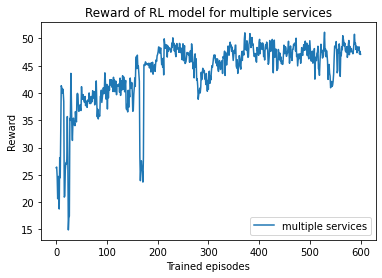

In [20]:
plt.plot(trained_600_multiple_services_reward, label="multiple services")
plt.title("Reward of RL model for multiple services")
plt.xlabel("Trained episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

### Algoprithm compare

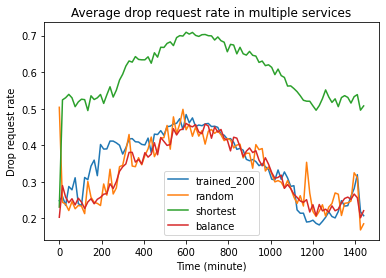

In [21]:
x_range = [i * 15 for i in range(len(drop_succ_rate_all[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, drop_succ_rate_all[index], label=f'{algo}')

plt.title("Average drop request rate in multiple services")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

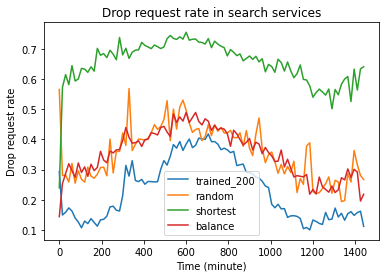

In [22]:
x_range = [i * 15 for i in range(len(drop_succ_rate_all[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, drop_succ_rate_search[index], label=f'{algo}')

plt.title("Drop request rate in search services")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

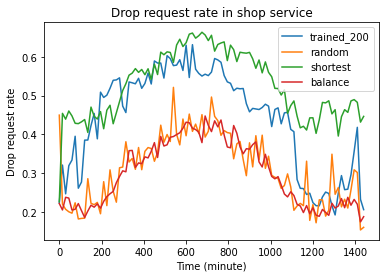

In [23]:
x_range = [i * 15 for i in range(len(drop_succ_rate_all[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, drop_succ_rate_shop[index], label=f'{algo}')

plt.title("Drop request rate in shop service")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

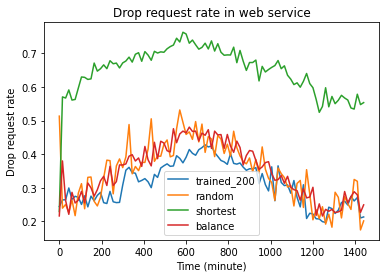

In [24]:
x_range = [i * 15 for i in range(len(drop_succ_rate_all[0]))]

for index, algo in enumerate(algos):
    plt.plot(x_range, drop_succ_rate_web[index], label=f'{algo}')

plt.title("Drop request rate in web service")
plt.xlabel("Time (minute)")
plt.ylabel("Drop request rate")
plt.legend()
plt.show()

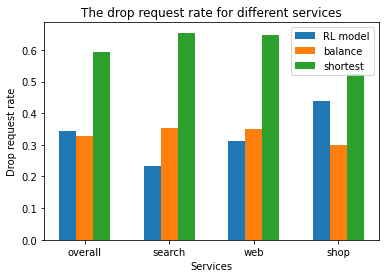

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = services
average_point_total
  
X_axis = np.arange(len(X))
# for ind, algo in enumerate(algos):
#     if algo == "random":
#         continue
plt.bar(X_axis - 0.2, average_point_total["trained_200"], 0.2, label = 'RL model')
plt.bar(X_axis, average_point_total["balance"], 0.2, label = 'balance')
plt.bar(X_axis + 0.2, average_point_total["shortest"], 0.2, label = 'shortest')
# plt.bar(X_axis + 0.3, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Services")
plt.ylabel("Drop request rate")
plt.title("The drop request rate for different services")
plt.legend()
plt.show()